# Stochastics

Topics:
* Random Number Generation
* Simulation (random variables, stochastic processes)
* Valuation (valuation of derivatives with European, American, Asian, and Bermudan style of exercise)
* Risk Measures (value-at-risk, credit value-at-risk, and credit value adjustments)

## Random Numbers

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

`rand` returns an `ndarray` object consisting of random numbers from the interval $[0, 1)$

In [2]:
npr.rand(10)

array([0.65971548, 0.25462597, 0.16869119, 0.53752778, 0.79929025,
       0.56252085, 0.91626506, 0.77937122, 0.11993754, 0.99532717])

In [3]:
npr.rand(5, 5)

array([[0.2791498 , 0.68817002, 0.65813045, 0.3740111 , 0.53398104],
       [0.23860734, 0.45659534, 0.71778852, 0.88817736, 0.86777875],
       [0.90632477, 0.60293151, 0.37351966, 0.78102658, 0.71467225],
       [0.96327   , 0.46450252, 0.73839283, 0.83688248, 0.6489014 ],
       [0.1716289 , 0.37468027, 0.87514984, 0.0447683 , 0.31598981]])

In [4]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([6.46178674, 9.12709478, 5.5063919 , 7.21533804, 8.10712051,
       5.20748612, 9.2117198 , 7.41677953, 5.93649662, 5.01824978])

In [5]:
npr.rand(5, 5) * (b - a) + a

array([[6.26536243, 9.74612651, 5.79392468, 5.7191098 , 6.32434576],
       [8.35748234, 8.24012027, 5.00667965, 6.37531411, 9.13505779],
       [9.89028795, 6.70068034, 9.3450895 , 6.6439488 , 8.4775376 ],
       [5.87799901, 6.94417731, 7.36476693, 7.57256732, 5.98931831],
       [8.29498791, 8.61493437, 5.72152268, 5.78676146, 7.81317262]])

In [6]:
sample_size = 1000
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

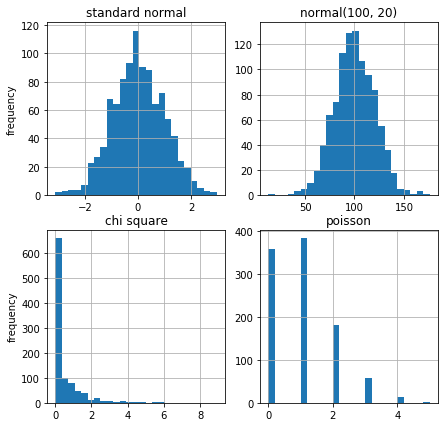

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax2.grid(True)
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)
ax4.hist(rn4, bins=25)
ax4.set_title('poisson')
ax4.grid(True)

## Simulation

Monte Carlo Simulation
* among the most (if not *the* most) flexible numerical method when it comes to derivative valuation
* come at the cost of a relatively high computational burden

### Random Variables

In [8]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

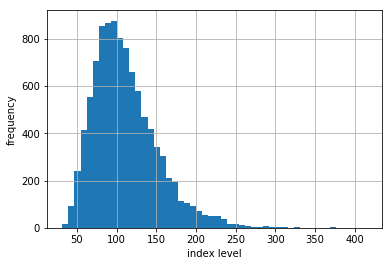

In [9]:
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)
# log-normal?

In [10]:
ST2 = S0 * npr.lognormal((r - sigma ** 2 / 2) * T, sigma * np.sqrt(T), size=I)

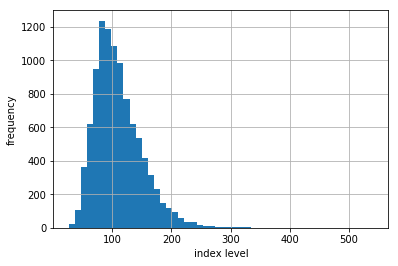

In [11]:
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [12]:
import scipy.stats as scs

In [13]:
def print_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('{:14s} {:14s} {:14s}'.format('statistic', 'data set 1', 'data set 2'))
    print(45 * '-')
    print('{:14s} {:14.3f} {:14.3f}'.format('size', sta1[0], sta2[0]))
    print('{:14s} {:14.3f} {:14.3f}'.format('min', sta1[1][0], sta2[1][0]))
    print('{:14s} {:14.3f} {:14.3f}'.format('max', sta1[1][1], sta2[1][1]))
    print('{:14s} {:14.3f} {:14.3f}'.format('mean', sta1[2], sta2[2]))
    print('{:14s} {:14.3f} {:14.3f}'.format('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('{:14s} {:14.3f} {:14.3f}'.format('skw', sta1[4], sta2[4]))
    print('{:14s} {:14.3f} {:14.3f}'.format('kurtosis', sta1[5], sta2[5]))

In [14]:
print_statistics(ST1, ST2)

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                    31.494         26.569
max                   414.896        540.804
mean                  111.006        110.357
std                    40.727         40.230
skw                     1.135          1.198
kurtosis                2.266          3.385


### Stochastic Processes

Roughly speaking, a stochastic process is a sequence of random variables. In general, stochastic processes in finance exhibit the Markov property, which states that tomorrow's value of the process only depends on today's state of the process, and not more "historic" state. The process is also called memoryless. 

#### Geometric Brownian Motion

Stochastic differential equations in BSM setup:
$$dS_t = rS_tdt + \sigma S_td Z_t$$
This SDE can be discretized by an Euler scheme:
$$S_t = S_{t-\Delta t}\exp\Big(\big(r-\frac{1}{2}\sigma^2\big)\Delta t+\sigma \sqrt{\Delta t}z_t\Big)$$

In [15]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(I))

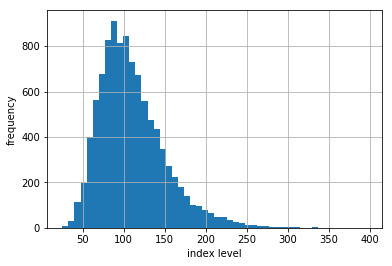

In [16]:
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [17]:
print_statistics(S[-1], ST2)

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                    25.119         26.569
max                   395.691        540.804
mean                  110.063        110.357
std                    40.354         40.230
skw                     1.161          1.198
kurtosis                2.337          3.385


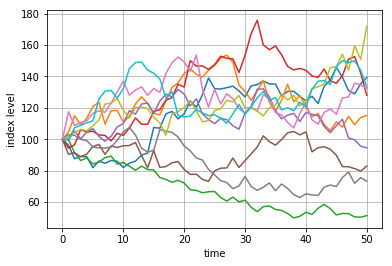

In [18]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

This is useful when valuing options with American/Bermudan exercise or options whose payoff is path-dependent. 

#### Square-root Diffusion

Another important class of financial processes is *mean-reversion processes*, which are used to model short rates or volatility processes. Mean reversion is financial theory suggesting that asset prices and returns eventually return back to the long-run mean or average of the entire dataset.  

Stochastic differential equation for square-root diffusion

$$dx_t=\kappa \big(\theta -x_t\big)dt+\sigma \sqrt{x_t}dZ_t$$

$x_t$: process level at date $t$  
$\kappa$: mean-reversion factor  
$\theta$: long-term mean of the process  
$\sigma$: constant valotility parameter  
$Z$: standard Brownian motion  

##### Euler discretization for square-root diffusion

$\tilde{x}_t=\tilde{x}_s+\kappa\big(\theta-\tilde{x}_s^+\big)\Delta t+\sigma\sqrt{\tilde{x}_s^+}\sqrt{\Delta t}z_t$  
$x_t=\tilde{x}_t^+$  

In [19]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [20]:
I = 10000
M = 50
dt = T / M


def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
                 + kappa * (theta - np.maximum(xh[t - 1],0)) * dt
                 + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)
                 * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1


x1 = srd_euler()

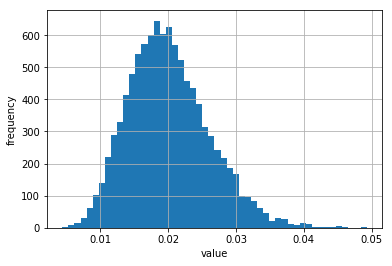

In [21]:
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

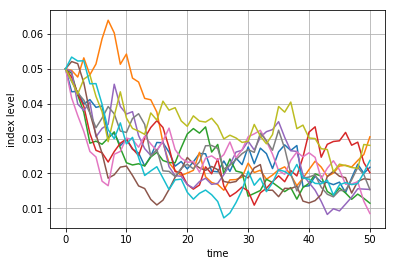

In [22]:
plt.plot(x1[:,:10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

#### Stochastic Volatility

BSM model assumes constant volatility. However, volatility in general is neither constant or deterministic; it is stochastic. 

##### Stochastic differential equations for Heston stochastic volatility model

$dS_t = rS_tdt+\sqrt{v_t}S_tdZ_t^1$  
$dv_t = \kappa_v\big(\theta_v-v_t\big)dt+\sigma\sqrt{v_t}dZ_t^2$  
$dZ_t^1dZ_t^2 = \rho$  

In [23]:
S0 = 100. # starting price
r = 0.05 # risk-free rate
v0 = 0.1 # starting volatility
kappa = 3.0 # mean-reversion faction
theta = 0.25 # long-term mean of volatility
sigma = 0.1 # constant volatility parameter
rho = 0.6 # instantaneous correlation - 
          # reflecting the leverage effect(volatility up when market down)
T = 1.0 # time frame

In [24]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [25]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [26]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))

In [27]:
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
            + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt) * ran[1])
v = np.maximum(vh, 0)

In [28]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M+1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - v[t] / 2) * dt + np.sqrt(v[t]) * np.sqrt(dt) * ran[0])

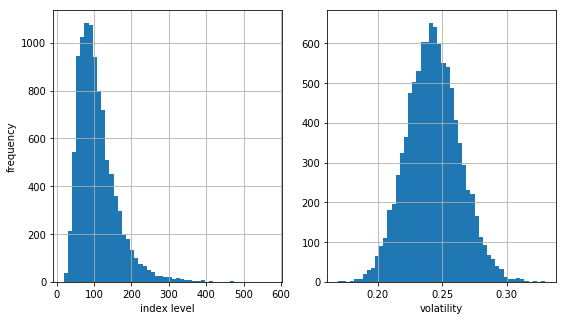

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

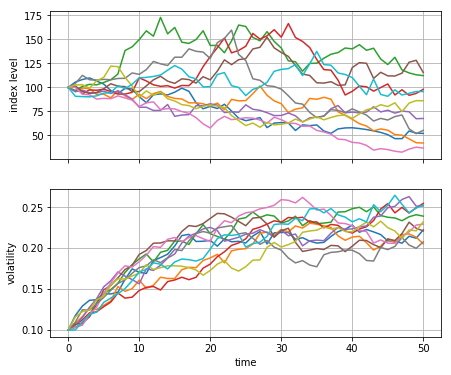

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [31]:
print_statistics(S[-1], v[-1])

statistic      data set 1     data set 2    
---------------------------------------------
size                10000.000      10000.000
min                    18.836          0.169
max                   573.628          0.330
mean                  108.466          0.243
std                    52.594          0.020
skw                     1.625          0.137
kurtosis                4.725          0.068


#### Jump Diffusion

Apart from stochastic volatility and leverage effect, another important stylized empirical fact is the existence of jumps in asset pricesand volatility. 

##### Stochastic differential equation for Merton jump diffusion model

$dS_t=\big(r - r_J\big)S_tdt+\sigma S_tdZ_t+J_tS_tdN_t$

$S_t$: index level at time t  
$r$: constant short-term risk-free rate  
$r_J$: drift correction for jump to maintain risk neutrality, with $r_J\equiv \lambda\big(e^{\mu_J+\frac{\delta^2}{2}}-1\big)$  
$\sigma$: constant volatility  
$Z_t$: standard brownian motion  
$J_t$: Jump at date t with distribution $log\big(1+J_t\big)\approx N\Big(log\big(1+\mu_J\big)-\frac{\delta^2}{2}\Big)$ with $N$ as the cumulative distribution function of a standard normal random variable.  
$N_t$: Poisson process with intensity $t$

##### Euler discretization for Merton jump diffusion model
$S_t=S_{t-\Delta t}\bigg(e^{\big(r - r_J - \frac{\sigma^2}{2}\big)\Delta t+\sigma\sqrt{\Delta t}z_t^1}+\Big(e^{\mu_J+\delta z_t^2}-1\Big)y_t\bigg)$

In [32]:
S0 = 100
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [33]:
M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + delta ** 2 / 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - sigma ** 2 / 2) * dt
           + sigma * np.sqrt(dt) * sn1[t])
           + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)

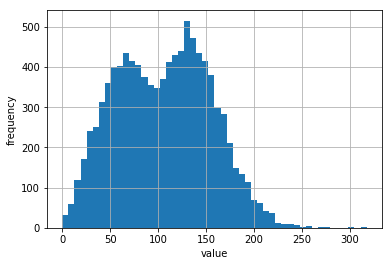

In [34]:
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

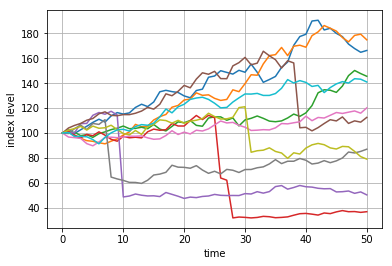

In [35]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

### Variance Reduction

The set of random numbers might not exhibit statistics close enough to desired ones. This because the numbers are pseudorandom or the sample size is not large enough. There are two common methods to reduce the variance of generated random numbers.

#### antithetic variates  
Only draw half of the desired number of random draws and add the same set of random numbers with their signs being the opposite. This approach corrects first moment (mean) perfectly. 

#### moment matching  
Adjust the draws by subtracting their mean and then divided by their standard deviation. This approach corrects the first and second moment (almost) perfectly.

In [36]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    if anti_paths == True:
        sn = npr.standard_normal((M + 1, I // 2))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match == True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

## Valuation

### European Options

##### Pricing by risk-neutral expection
$C_0=e^{-rT}E^Q_0\big(h(S_T)\big)=e^{-rT}\int^\infty_0h(s)q(s)ds$

##### Risk-neutral Monte Carlo estimator
$\tilde{C}_0=e^{-rT}\frac{1}{I}\Sigma^I_{i=1}h(\tilde{S}^i_T)$

In [37]:
S0 = 100.
r = 0.05
vol = 0.25
T = 1.0
I = 50000


def gbm_mcs_stat(K):
    sn = gen_sn(1, I)
    ST = S0 * np.exp((r - vol ** 2 / 2) * T + vol * np.sqrt(T) * sn[1])
    hT = np.maximum(ST - K, 0)
    C0 = np.exp(-r * T) / I * hT.sum()
    return C0

In [38]:
gbm_mcs_stat(K=105.)

10.06219045854341

In [40]:
M = 50


def gbm_mcs_dyna(K, option='call'):
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * sn[t])
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    elif option == 'put':
        hT = np.maximum(K - S[-1], 0)
    else:
        return -1
    C0 = np.exp(-r * T) / I * hT.sum()
    return C0

In [41]:
gbm_mcs_dyna(K=110., option='call')

8.077304887269609

In [42]:
gbm_mcs_dyna(K=110., option='put')

12.678292836956938

### American Options (needs further study)

##### American option prices as optimal stopping problem
$V_0=\sup{e^{-rT}E^Q_0\big(h_\tau(S_\tau)\big)}$, where $\tau\in\{0,\Delta t,2\Delta t,...,T\}$.

##### Least-squares regression for American option valuation
$\min_{\alpha_{1,t},...,\alpha_{D,t}}\frac{1}{I}\Sigma^I_{i=1}\big(Y_{t,i}-\Sigma^D_{d=1}\alpha_{d,t}b_d(S_{t,i})\big)^2$

In [47]:
def gbm_mcs_amer(K, option='call'):
    dt = T / M
    df = np.exp(-r * dt)
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * sn[t])
    if option == 'call':
        h = np.maximum(S - K, 0)
    elif option == 'put':
        h = np.maximum(K - S, 0)
    else:
        return -1
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    C0 = df / I * V[1].sum()
    return C0

In [48]:
gbm_mcs_amer(110., option='call')

7.800446622118444

In [49]:
gbm_mcs_amer(110., option='put')

13.607843939512557

## Risk Measures

### Value-at-risk
VaR is one of the most widely used risk measures. It tries to capture tail risk. 
"a VaR of $50,000 at a confidence level of 99\% over a time period of 30 days" means there is a probability of 1\% that a loss of a minimum of 50,000 USD or higher will occur. 

In [51]:
S0 = 100.
r = 0.05
vol = 0.25
T = 30 / 365
I = 10000
ST = S0 * np.exp((r - vol ** 2 / 2) * T + vol * np.sqrt(T) * npr.standard_normal(I))

In [52]:
R_gbm = np.sort(ST - S0)

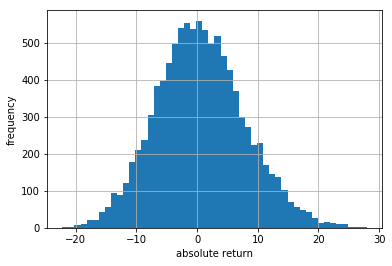

In [53]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [63]:
percs = [0.01, 0.1, 1., 2.5, 5., 10.]
var = scs.scoreatpercentile(R_gbm, percs)
print('{:16s} {:16s}'.format('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('{:16.2f} {:16.3f}'.format(100 - pair[0], -pair[1]))

Confidence Level Value-at-Risk   
---------------------------------
           99.99           21.601
           99.90           19.381
           99.00           15.285
           97.50           13.213
           95.00           10.895
           90.00            8.495


/Users/chuang/miniconda3/envs/PyQuant/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [65]:
dt = 30. / 365 / M
rj = lamb * (np.exp(mu + delta ** 2 / 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1):
    S[t] = S[t - 1] * (np.exp((r - rj - vol ** 2 / 2) * dt 
                    + vol * np.sqrt(dt) * sn1[t]) 
                    + (np.exp(mu + delta * sn2[t]) -1) * poi[t])
    S[t] = np.maximum(S[t], 0)

In [66]:
R_jd = np.sort(S[-1] - S0)

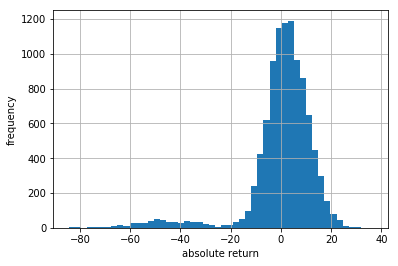

In [67]:
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [68]:
percs = [0.01, 0.1, 1., 2.5, 5., 10.]
var = scs.scoreatpercentile(R_jd, percs)
print('{:16s} {:16s}'.format('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('{:16.2f} {:16.3f}'.format(100 - pair[0], -pair[1]))

Confidence Level Value-at-Risk   
---------------------------------
           99.99           82.226
           99.90           73.263
           99.00           56.955
           97.50           46.948
           95.00           27.279
           90.00            9.080


/Users/chuang/miniconda3/envs/PyQuant/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [69]:
percs = list(np.arange(0., 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

/Users/chuang/miniconda3/envs/PyQuant/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(-88.3490724386599, 0.0)

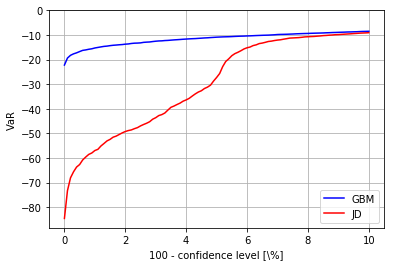

In [71]:
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [\%]')
plt.ylabel('VaR')
plt.grid(True)
plt.ylim(top=0.)

### Credit Value Adjustments
- credit value at risk (CVaR)  
- credit value adjustment (CVA)  
CVaR is a measure of the risk resulting from the possibility that a counterparty might not be able to honor its obligations. There are two main assumptions: probability of default and the loss level.

In [72]:
S0 = 100.
r = 0.05
vol = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((r - vol ** 2 / 2) * T + vol * np.sqrt(T) * npr.standard_normal(I))

In [74]:
L = 0.5 # a fixed loss level
p = 0.01 # a fixed probability for default of a counterparty

In [75]:
D = npr.poisson(p * T, I)
D = np.where(D > 1, 1, D)

In [76]:
np.exp(-r * T) / I * ST.sum()

99.92491978247067

In [80]:
CVaR = np.exp(-r * T) / I * (L * D * ST).sum()
CVaR

0.5005077125656152

In [81]:
S0_CVA = np.exp(-r * T) / I * ((1 - L * D)* ST).sum()
S0_CVA

99.42441206990505

In [82]:
S0_adj = S0 - CVaR
S0_adj

99.49949228743438